# Lab 1 - Data collection, wrangling, & GIS operations

**Complete all exercises directly in this notebook using Python.**

### Kha-Ai Tran: Lab 1, due 10/8/2021

In [237]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
pd.options.display.max_rows = 50

## Exercise 1 (3 points) 
<div class="alert alert-block alert-success">
       Exercise 1.1: Have a look at the Guardian's version of Wikileaks' Afghanistan war logs. 

</div>





Source is here [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). 

The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

And its structure is as follows:





In [2]:
from IPython.display import IFrame
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1'
IFrame(url, 700, 400)

<div class="alert alert-block alert-success">
       Exercise 2.2: Download the table as a csv file (File --> Download as --> .csv, current sheet) read it into Python.
</div>


<div class="alert alert-block alert-success">
       Exercise 2.3: Explore it by creating a few plots.
</div>

<div class="alert alert-block alert-success">
       Exercise 2.4: Obtain a monthly total count of casualties and create a line or a bar plot of them.
</div>




In [8]:
afghan_war = pd.read_csv('afghan_war.csv', header=1)
afghan_war.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15,51,23,NaN,11.0
1,2004.0,February,NaN,7,4,5,2.0
2,2004.0,March,19,2,NaN,2,3.0
3,2004.0,April,5,3,19,NaN,3.0
4,2004.0,May,18,29,56,6,9.0


In [9]:
afghan_war['Year'].unique()

array([2004., 2005., 2006., 2007., 2008., 2009.,   nan])

In [10]:
afghan_war.drop(afghan_war.tail(1).index,inplace=True)

In [11]:
afghan_war

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15,51,23,NaN,11.0
1,2004.0,February,NaN,7,4,5,2.0
2,2004.0,March,19,2,NaN,2,3.0
3,2004.0,April,5,3,19,NaN,3.0
4,2004.0,May,18,29,56,6,9.0
...,...,...,...,...,...,...,...
67,2009.0,August,445,206,190,64,77.0
68,2009.0,September,614,197,133,54,70.0
69,2009.0,October,462,107,86,76,74.0
70,2009.0,November,410,120,69,30,32.0


In [17]:
m = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12 }
afghan_war.Month = afghan_war.Month.map(m)
afghan_war['DATE'] = pd.to_datetime(afghan_war[['Year', 'Month']].assign(DAY=1))
afghan_war

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,DATE
0,2004.0,1,15,51,23,NaN,11.0,2004-01-01
1,2004.0,2,NaN,7,4,5,2.0,2004-02-01
2,2004.0,3,19,2,NaN,2,3.0,2004-03-01
3,2004.0,4,5,3,19,NaN,3.0,2004-04-01
4,2004.0,5,18,29,56,6,9.0,2004-05-01
...,...,...,...,...,...,...,...,...
67,2009.0,8,445,206,190,64,77.0,2009-08-01
68,2009.0,9,614,197,133,54,70.0,2009-09-01
69,2009.0,10,462,107,86,76,74.0,2009-10-01
70,2009.0,11,410,120,69,30,32.0,2009-11-01


In [29]:
# drop NaN for plotting
afghan_war_nona = afghan_war.dropna()
afghan_war_nona

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,DATE
4,2004.0,5,18,29,56,6,9.0,2004-05-01
5,2004.0,6,163,32,14,2,5.0,2004-06-01
7,2004.0,8,20,26,10,3,4.0,2004-08-01
9,2004.0,10,13,14,14,2,8.0,2004-10-01
10,2004.0,11,21,19,36,2,7.0,2004-11-01
...,...,...,...,...,...,...,...,...
67,2009.0,8,445,206,190,64,77.0,2009-08-01
68,2009.0,9,614,197,133,54,70.0,2009-09-01
69,2009.0,10,462,107,86,76,74.0,2009-10-01
70,2009.0,11,410,120,69,30,32.0,2009-11-01


In [31]:
afghan_war_nona.dtypes

Year                                     float64
Month                                      int64
Taliban                                   object
Civilians                                 object
Afghan forces                             object
Nato (detailed in spreadsheet)            object
Nato - official figures                  float64
DATE                              datetime64[ns]
dtype: object

In [35]:
afghan_war_nona = afghan_war_nona.rename(columns={'Afghan forces':'Afghan_forces', 'Nato (detailed in spreadsheet)':'Nato_detailed', 'Nato - official figures':'Nato_official'})
afghan_war_nona

,Year,Month,Taliban,Civilians,Afghan_forces,Nato_detailed,Nato_official,DATE
4,2004.0,5,18,29,56,6,9.0,2004-05-01
5,2004.0,6,163,32,14,2,5.0,2004-06-01
7,2004.0,8,20,26,10,3,4.0,2004-08-01
9,2004.0,10,13,14,14,2,8.0,2004-10-01
10,2004.0,11,21,19,36,2,7.0,2004-11-01
...,...,...,...,...,...,...,...,...
67,2009.0,8,445,206,190,64,77.0,2009-08-01
68,2009.0,9,614,197,133,54,70.0,2009-09-01
69,2009.0,10,462,107,86,76,74.0,2009-10-01
70,2009.0,11,410,120,69,30,32.0,2009-11-01


In [46]:
# convert data types to integer for plotting
afghan_war_nona['Taliban'] = afghan_war_nona['Taliban'].astype(str).astype(int)
afghan_war_nona['Civilians'] = afghan_war_nona['Civilians'].astype(str).astype(int)
afghan_war_nona['Afghan_forces'] = afghan_war_nona['Afghan_forces'].astype(str).astype(int)
afghan_war_nona['Nato_detailed'] = afghan_war_nona['Nato_detailed'].astype(str).astype(int)
afghan_war_nona.dtypes

Year                    float64
Month                     int64
Taliban                   int32
Civilians                 int32
Afghan_forces             int32
Nato_detailed             int32
Nato_official           float64
DATE             datetime64[ns]
dtype: object

In [48]:
afghan_war_nona = afghan_war_nona.drop(columns=['Year', 'Month'])
afghan_war_nona

,Taliban,Civilians,Afghan_forces,Nato_detailed,Nato_official,DATE
4,18,29,56,6,9.0,2004-05-01
5,163,32,14,2,5.0,2004-06-01
7,20,26,10,3,4.0,2004-08-01
9,13,14,14,2,8.0,2004-10-01
10,21,19,36,2,7.0,2004-11-01
...,...,...,...,...,...,...
67,445,206,190,64,77.0,2009-08-01
68,614,197,133,54,70.0,2009-09-01
69,462,107,86,76,74.0,2009-10-01
70,410,120,69,30,32.0,2009-11-01


<AxesSubplot:xlabel='DATE'>

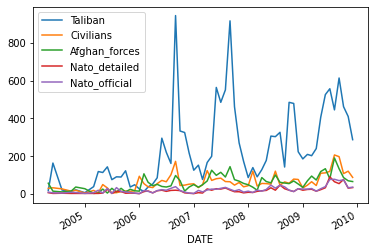

In [49]:
afghan_war_nona.plot(x='DATE')

<AxesSubplot:xlabel='Afghan_forces', ylabel='Taliban'>

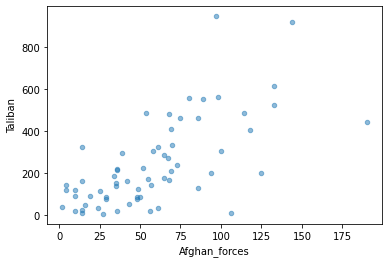

In [52]:
afghan_war_nona.plot.scatter(x="Afghan_forces", y="Taliban", alpha=0.5)

<AxesSubplot:>

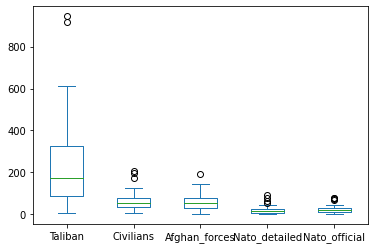

In [55]:
afghan_war_nona.plot.box()

In [63]:
# Obtain total monthly count of casualties and create a line or bar chart out of them
afghan_war_group = afghan_war.dropna()
afghan_war_group = afghan_war_group.rename(columns={'Afghan forces':'Afghan_forces', 'Nato (detailed in spreadsheet)':'Nato_detailed', 'Nato - official figures':'Nato_official'})
afghan_war_group['Taliban'] = afghan_war_group['Taliban'].astype(str).astype(int)
afghan_war_group['Civilians'] = afghan_war_group['Civilians'].astype(str).astype(int)
afghan_war_group['Afghan_forces'] = afghan_war_group['Afghan_forces'].astype(str).astype(int)
afghan_war_group['Nato_detailed'] = afghan_war_group['Nato_detailed'].astype(str).astype(int)
afghan_war_group['Year'] = afghan_war_group['Year'].astype(int)
afghan_war_group = afghan_war_group.groupby(['Month','Year']).sum()

In [64]:
afghan_war_group

Taliban  Civilians  Afghan_forces  Nato_detailed  Nato_official
Month Year                                                                 
1     2005        6          4             27              2            2.0
      2006       26         93             14              1            1.0
      2007      125         53             49              1            2.0
      2008       86         43             48              8           14.0
      2009      185         31             34             19           25.0
...             ...        ...            ...            ...            ...
12    2005       48         16             16              3            4.0
      2006      216         51             36              3            4.0
      2007      172         37             55              5            9.0
      2008      223         76             52             27           27.0
      2009      287         87             65             33           35.0

[64 rows x 5 columns]

<AxesSubplot:title={'center':'Total Monthly Casualties Over Time'}, xlabel='Month,Year', ylabel='Total Casualties'>

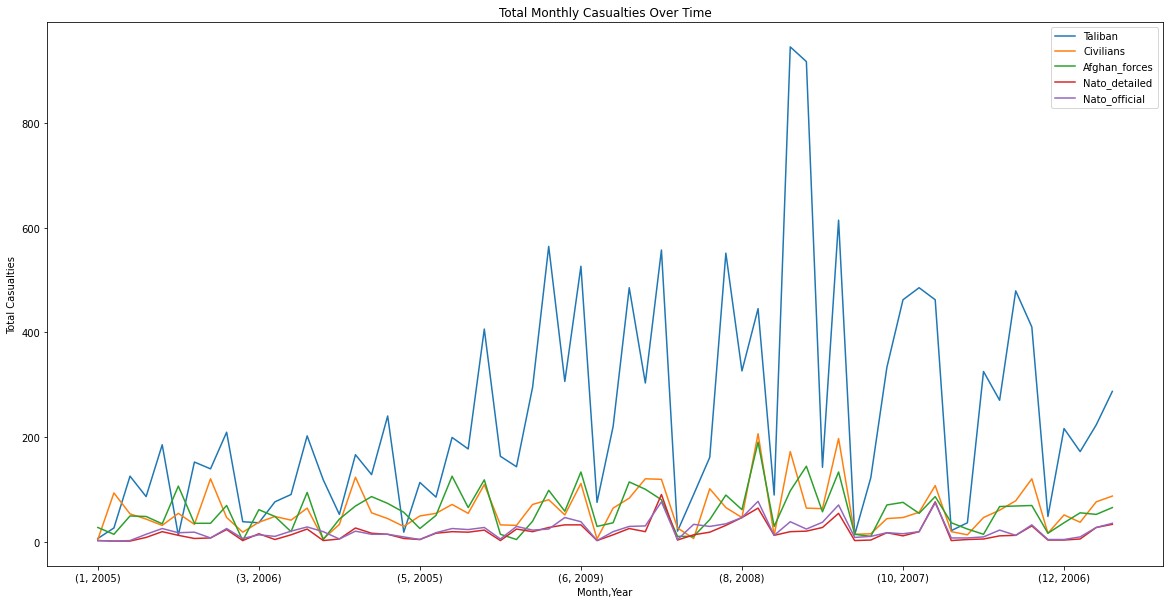

In [71]:
afghan_war_group.plot(figsize=(20, 10),
                     ylabel='Total Casualties',
                     title='Total Monthly Casualties Over Time')

<AxesSubplot:title={'center':'Total Monthly Casualties'}, xlabel='Month,Year', ylabel='Total Casualties'>

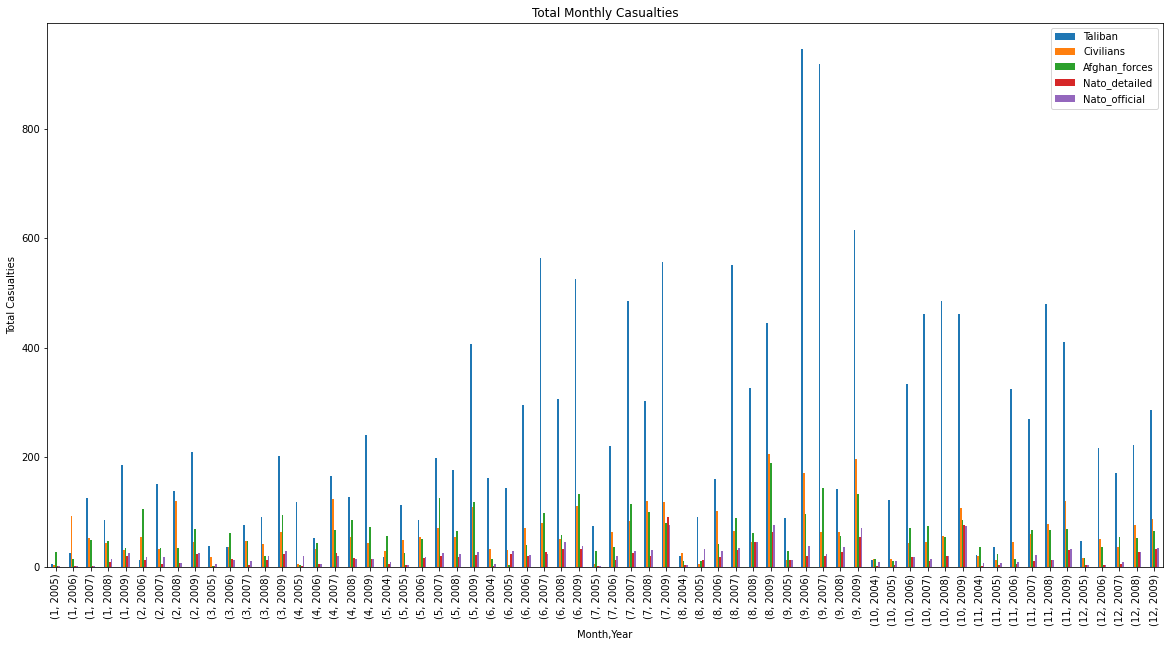

In [70]:
afghan_war_group.plot.bar(figsize=(20,10),
                         ylabel='Total Casualties',
                         title='Total Monthly Casualties')

## Exercise 2 (3 points) 
<div class="alert alert-block alert-success">
       Exercise 2.1: Read the rivers data
</div>
<div class="alert alert-block alert-success">
       Exercise 2.2: Read the first 5 rows of the rivers dataset
</div>
<div class="alert alert-block alert-success">
       Exercise 2.3: Visualize rivers dataset. 
</div>



In [75]:
rivers = gpd.read_file('rivers.gpkg')
rivers.head()

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"MULTILINESTRING ((104.61476 12.38203, 104.6176..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"MULTILINESTRING ((37.73951 59.07954, 37.75733 ..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"MULTILINESTRING ((38.47804 59.21666, 38.48528 ..."


<AxesSubplot:>

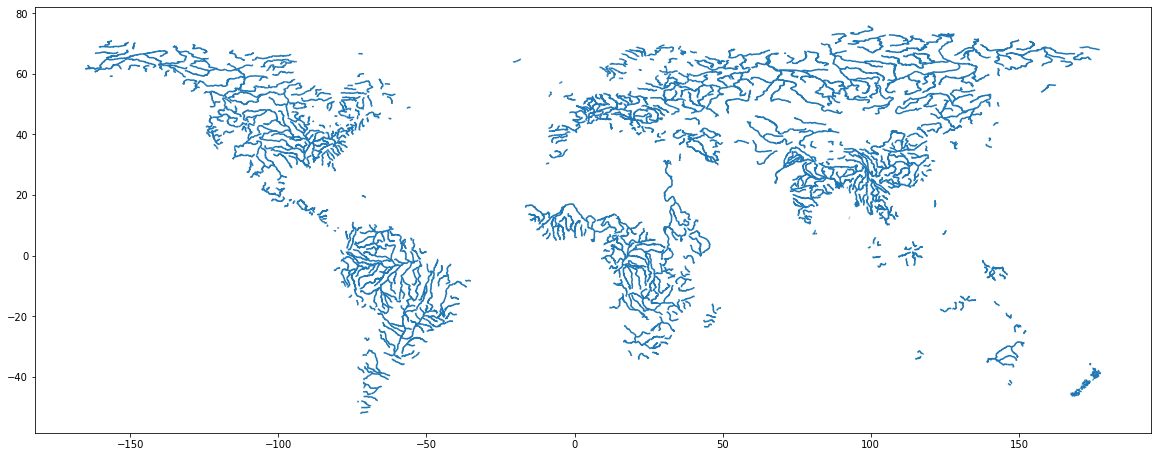

In [83]:
# Visualize rivers dataset

rivers.plot(figsize=(20,15))

## Exercise 3 (2 points) 

<div class="alert alert-block alert-success">
       Exercise 3.1: Convert the cities data into EPSG:3395 and plot cities on top of countries data projected into EPSG:3395
</div>

<div class="alert alert-block alert-success">
       Exercise 3.2: Save the projected cities file you created in exercise 2.1 into a file
</div>

In [295]:
# Convert the cities data into EPSG:3395 and plot cities on top of countries data projected into EPSG:3395
cities = gpd.read_file('cities.geojson')
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

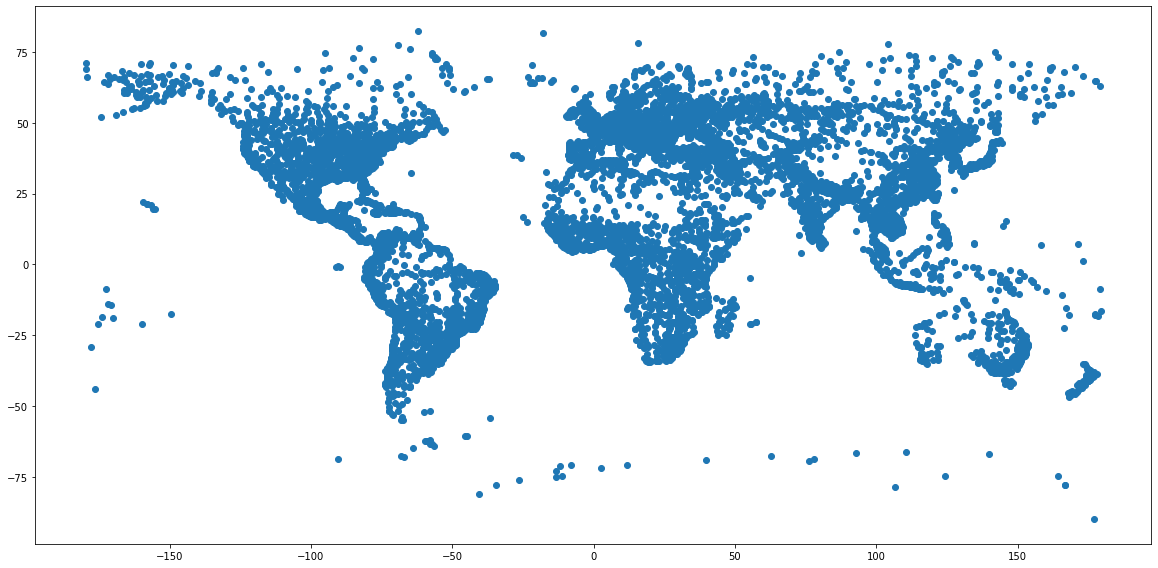

In [296]:
cities.plot(figsize=(20,20))

In [351]:
cities_3395 = gpd.GeoDataFrame(
    cities_3395, geometry=gpd.points_from_xy(x=cities_3395.longitude, y=cities_3395.latitude)
)
cities_3395 = cities.to_crs(epsg=3395)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world_3395 = world.to_crs(epsg=3395)

cities_3395

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
0,Colonia del Sacramento,0.0,0,-34.479999,-57.840002,21714,21714,0,POINT (-6438719.623 -4069248.462)
1,Trinidad,0.0,0,-33.543999,-56.900997,21093,21093,0,POINT (-6334189.963 -3944125.489)
2,Fray Bentos,0.0,0,-33.138999,-58.303997,23279,23279,0,POINT (-6490371.310 -3890411.118)
3,Canelones,0.0,0,-34.538004,-56.284001,19698,19698,0,POINT (-6265506.386 -4077048.683)
4,Florida,0.0,0,-34.099002,-56.214998,32234,32234,0,POINT (-6257825.002 -4018149.162)
...,...,...,...,...,...,...,...,...,...
7338,Rio de Janeiro,1.0,1,-22.925023,-43.225021,11748000,2010175,1821489,POINT (-4812003.916 -2606082.626)
7339,São Paulo,1.0,1,-23.558680,-46.625020,18845000,10021295,11522944,POINT (-5190490.094 -2682415.953)
7340,Sydney,1.0,1,-33.920011,151.185180,4630000,3641422,2669348,POINT (16829640.620 -3993963.305)
7341,Singapore,1.0,1,1.293033,103.855821,5183700,3289529,3314179,POINT (11560960.462 143203.757)


In [352]:
cities_3395 = cities_3395.set_crs(epsg=3395)
cities_3395.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

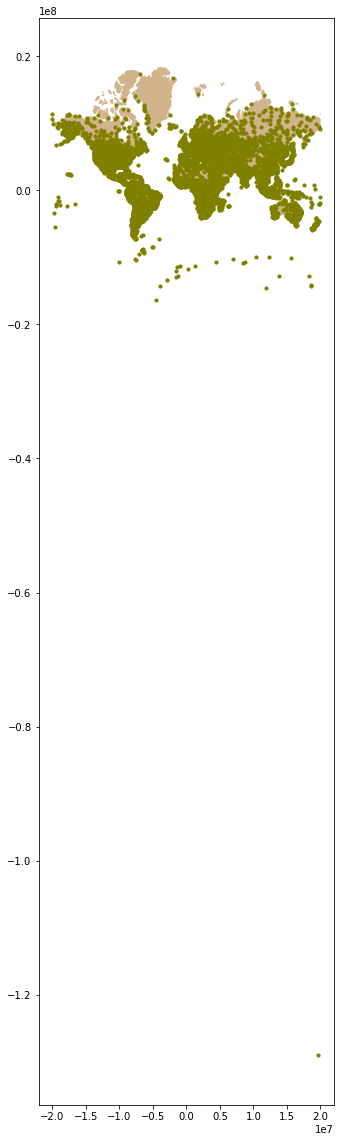

In [353]:
fig, ax = plt.subplots(figsize=(20,20))

world_3395.plot(color='tan',
                ax=ax
              )
cities_3395.plot(markersize=10,
                 color='olive',
                 ax=ax
                )

In [354]:
# Save
cities_3395.to_file("cities_3395.shp")

## Exercise 4 (7 points)

<div class="alert alert-block alert-success">
       Exercise 4.1: Use cenpy to collect any three variables at the censuss tract geograhy for a city of your choice. 
</div>

<div class="alert alert-block alert-success">
       Exercise 4.2: Check and report the correlation amongst the variables
</div>

<div class="alert alert-block alert-success">
       Exercise 4.3: Use statsmodels to conduct a basic regression on the variables (one as the dependent and two as independent variables). Determine if any are statistically significant. 
</div>

<div class="alert alert-block alert-success">
       Exercise 4.4: Use cenpy to collect county geometries and peform a spatial join with tracts (We want to know which county eaach tract is within). 
</div>

<div class="alert alert-block alert-success">
       Exercise 4.5: Aggregate one of the variables by county and map it. 
</div>

In [356]:
import cenpy
from cenpy import products

In [357]:
savannah = products.ACS(2017).from_place('Savannah, GA', level='tract',
                                        variables=['B01003', 'B08119', 'B27015'])

c:\users\khaai\appdata\local\programs\python\python38\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Matched: Savannah, GA to Savannah city within layer Incorporated Places


In [360]:
savannah

,GEOID,geometry,B01003_001E,B08119_001E,B08119_002E,B08119_003E,B08119_004E,B08119_005E,B08119_006E,B08119_007E,...,B27015_017E,B27015_018E,B27015_019E,B27015_020E,B27015_021E,B27015_022E,B27015_023E,B27015_024E,B27015_025E,B27015_026E
0,13051004208,"POLYGON ((-9034731.510 3761489.720, -9034682.6...",4944.0,2468.0,352.0,348.0,519.0,643.0,262.0,212.0,...,407.0,373.0,318.0,80.0,34.0,607.0,559.0,526.0,121.0,48.0
1,13051003301,"POLYGON ((-9031955.530 3772590.350, -9031907.1...",1901.0,867.0,121.0,44.0,311.0,179.0,151.0,32.0,...,74.0,59.0,49.0,10.0,15.0,235.0,168.0,147.0,34.0,67.0
2,13051000601,"POLYGON ((-9031562.800 3773816.460, -9031555.9...",4949.0,1409.0,356.0,238.0,189.0,280.0,134.0,96.0,...,487.0,263.0,166.0,97.0,224.0,346.0,312.0,221.0,158.0,34.0
3,13051000900,"POLYGON ((-9027461.010 3772582.470, -9027443.9...",1076.0,364.0,34.0,37.0,11.0,28.0,74.0,30.0,...,91.0,91.0,91.0,31.0,0.0,399.0,366.0,351.0,200.0,33.0
4,13051003501,"POLYGON ((-9027399.230 3766566.980, -9027388.6...",2652.0,1109.0,283.0,97.0,183.0,168.0,203.0,62.0,...,184.0,184.0,154.0,58.0,0.0,211.0,182.0,182.0,0.0,29.0
5,13051003302,"POLYGON ((-9032116.390 3772077.500, -9032057.5...",1776.0,505.0,96.0,71.0,101.0,95.0,43.0,36.0,...,205.0,194.0,127.0,102.0,11.0,147.0,121.0,113.0,75.0,26.0
6,13051002600,"POLYGON ((-9027705.130 3770111.190, -9027692.2...",1627.0,798.0,106.0,84.0,233.0,111.0,55.0,137.0,...,170.0,129.0,100.0,29.0,41.0,242.0,225.0,196.0,45.0,17.0
7,13051004001,"POLYGON ((-9030343.960 3766975.070, -9030339.6...",4104.0,1662.0,109.0,164.0,209.0,281.0,220.0,242.0,...,336.0,336.0,206.0,164.0,0.0,1470.0,1381.0,1272.0,357.0,89.0
8,13051004212,"POLYGON ((-9036060.880 3759770.780, -9036058.7...",5857.0,2709.0,676.0,177.0,594.0,439.0,297.0,193.0,...,654.0,654.0,588.0,213.0,0.0,955.0,907.0,835.0,126.0,48.0
9,13051002900,"POLYGON ((-9028739.290 3768669.820, -9028701.5...",3197.0,1840.0,188.0,108.0,86.0,287.0,327.0,157.0,...,520.0,490.0,456.0,89.0,30.0,1645.0,1495.0,1378.0,185.0,150.0


In [359]:
# Check and report the correlation amongst the variables
print(savannah.corr())

             B01003_001E  B08119_001E  B08119_002E  B08119_003E  B08119_004E  \
B01003_001E     1.000000     0.916234     0.844342     0.769574     0.685703   
B08119_001E     0.916234     1.000000     0.819047     0.747146     0.747802   
B08119_002E     0.844342     0.819047     1.000000     0.625799     0.786544   
B08119_003E     0.769574     0.747146     0.625799     1.000000     0.678723   
B08119_004E     0.685703     0.747802     0.786544     0.678723     1.000000   
B08119_005E     0.849731     0.910799     0.690912     0.779561     0.735319   
B08119_006E     0.661551     0.795778     0.543420     0.388646     0.363177   
B08119_007E     0.668152     0.773891     0.398955     0.570870     0.362254   
B08119_008E     0.576480     0.648363     0.609528     0.204606     0.297144   
B08119_009E     0.293647     0.425795     0.027655     0.012679    -0.177248   
B08119_010E     0.882522     0.984199     0.759423     0.687764     0.693439   
B08119_011E     0.847585     0.889051   

In [364]:
# Use statsmodels to conduct a basic regression on the variables (one as the dependent and two as independent variables). 
# Determine if any are statistically significant.
import statsmodels.api as sm
X = savannah[['B27015_001E','B08119_001E']]

model = sm.GLM(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                 Generalized Linear Model Regression Results                  
Dep. Variable:            B01003_001E   No. Observations:                   26
Model:                            GLM   Df Residuals:                       24
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      1.2274e+05
Method:                          IRLS   Log-Likelihood:                -188.18
Date:                Fri, 08 Oct 2021   Deviance:                   2.9459e+06
Time:                        23:57:57   Pearson chi2:                 2.95e+06
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
B27015_001E     0.8923      0.153      5.840      

In [ ]:
# Use cenpy to collect county geometries and peform a spatial join with tracts (We want to know which county eaach tract is within).

In [ ]:
# Aggregate one of the variables by county and map it.

## Exercise 5 (10 points) 

**Read all tasks below before choosing data. This exercise might be useful toward preliminary project ideas.**

<div class="alert alert-block alert-success">
       Exercise 5.1: Collect any three geographic datasets that overlap to at least some degree (at least one must be vector; use at least two different sources of data; at least one must be polygon; two must be automatically collected).
</div>

<div class="alert alert-block alert-success">
       Exercise 5.2: Plot them together on a single map.
</div>

<div class="alert alert-block alert-success">
       Exercise 5.3: Perform a buffer operation on one of your datasets and map the results (use centroids if needed. 
</div>

<div class="alert alert-block alert-success">
       Exercise 5.4: Perform two additional different GIS operationss on your data and map the results of each. 
</div>

<div class="alert alert-block alert-success">
       Exercise 5.5: Perform a join on two of the datasets (spatial or aspatial). One dataset must be the outcome of a GIS operation from exercises 5.3/5.4
</div>

<div class="alert alert-block alert-success">
       Exercise 5.6: Create a new variable for one of the datasets that sums/counts a geographic feature of another dataset (can be original or derivative of previous task).
</div>

<div class="alert alert-block alert-success">
       Exercise 5.7: Create a new variable for one of the datasets that sums/counts an attribute feature of another dataset (can be original or derivative of previous task).
</div>

**Save your notebook and make a pull request directed to your branch of the class repository**

In [77]:
soils = gpd.read_file('S_USA.SoilsSections.shp')
soils.head()

,MAP_TYPE,MAP_LEVEL,PROJECT,MAP_UNIT_S,MAP_UNIT_N,MAP_UNIT_D,AWC_100_CM,AWC_150_CM,AWC_250_CM,HYDRO_GP_A,...,SECTION_,SECTION_ID,AREA,PERIMETER,ACRES,GIS_ACRES,GIS_MILES,SHAPE_AREA,SHAPE_LEN,geometry
0,ECUN,SECT,ECOMAP07,332B,Western Glaciated Plains,The landscape of this section consists of leve...,17.27,25.23,26.20,2.00,...,44,44,0.0,1.957214e+06,8.776488e+06,8.776449e+06,1228.911,4.046853,20.895080,"POLYGON ((-100.01769 44.28545, -100.02708 44.2..."
1,ECUN,SECT,ECOMAP07,222M,Minnesota and Northeast Iowa Morainal-Oak Sava...,"The landscape is level plains and low, rolling...",18.05,25.21,27.47,8.80,...,45,45,0.0,3.807242e+06,1.515984e+07,1.516001e+07,2369.836,6.935053,41.768447,"POLYGON ((-92.08464 45.21803, -92.08545 45.217..."
2,ECUN,SECT,ECOMAP07,263A,Northern California Coast,This section has low-elevation parallel ranges...,11.16,14.25,15.06,0.39,...,46,46,0.0,1.721514e+06,4.046750e+06,4.046747e+06,1086.288,1.717274,17.248952,"MULTIPOLYGON (((-122.12962 38.28754, -122.1286..."
3,ECUN,SECT,ECOMAP07,212X,Northern Highlands,This section is a dissected glacial pitted out...,18.35,24.38,26.47,16.03,...,47,47,0.0,1.571884e+06,7.305745e+06,7.305592e+06,977.725,3.417263,17.400373,"POLYGON ((-91.55795 45.52961, -91.55706 45.529..."
4,ECUN,SECT,ECOMAP07,342A,Bighorn Basin,The unglaciated plains of this section are typ...,10.07,13.41,14.07,1.02,...,48,48,0.0,9.628053e+05,5.528739e+06,5.528855e+06,596.514,2.520408,10.603023,"POLYGON ((-108.74542 43.65386, -108.75384 43.6..."


<AxesSubplot:>

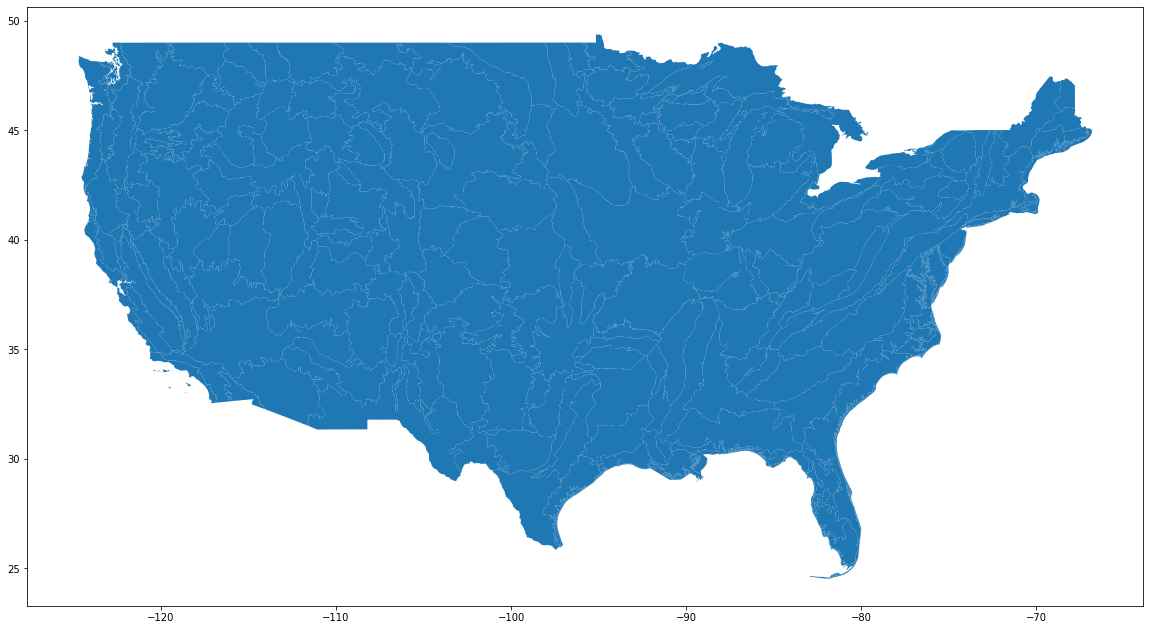

In [85]:
soils.plot(figsize=(20,15))

In [180]:
powerplants = gpd.read_file('Power_Plants.geojson')
powerplants.head()

,OBJECTID,PLANT_CODE,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,STATUS,...,NGAS_USED,OIL_USED,NET_GEN,CAP_FACTOR,SUB_1,SUB_2,LINES,SOURCE_LAT,SOURC_LONG,geometry
0,1,10504,AMALGAMATED SUGAR TWIN FALLS,2320 ORCHARD DRIVE EAST,TWIN FALLS,ID,83301,NOT AVAILABLE,CONVENTIONAL STEAM COAL,OP,...,1281711.0,0.0,51971.0,0.69797,NOT AVAILABLE,NOT AVAILABLE,0.0,42.532549,-114.432022,POINT (-114.43202 42.53255)
1,2,56566,CASTLE CREEK HYDROPLANT,1080 POWER PLANT ROAD,ASPEN,CO,81611,NOT AVAILABLE,CONVENTIONAL HYDROELECTRIC,IP,...,0.0,0.0,0.0,0.00000,NOT AVAILABLE,NOT AVAILABLE,0.0,39.195008,-106.835044,POINT (-106.83504 39.19501)
2,3,7458,RUEDI,14151 FRYING PAN ROAD,ASPEN,CO,81611,NOT AVAILABLE,CONVENTIONAL HYDROELECTRIC,OP,...,0.0,0.0,22690.0,0.57560,NOT AVAILABLE,NOT AVAILABLE,0.0,39.363113,-106.821941,POINT (-106.82194 39.36311)
3,4,6204,LARAMIE RIVER STATION,HWY 320,WHEATLAND,WY,82201,NOT AVAILABLE,CONVENTIONAL STEAM COAL,OP,...,0.0,37956.0,10282950.0,0.68646,LARAMIE RIVER,NOT AVAILABLE,3.0,42.109060,-104.883883,POINT (-104.88388 42.10906)
4,5,8028,ARVADA,HWY 14,ARVADA,WY,82831,NOT AVAILABLE,NATURAL GAS FIRED COMBUSTION TURBINE,OP,...,2492.0,0.0,165.0,0.00126,UNKNOWN204352,NOT AVAILABLE,1.0,44.693776,-105.977717,POINT (-105.97772 44.69378)


In [260]:
powerplants.columns

Index(['OBJECTID', 'PLANT_CODE', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'TELEPHONE', 'TYPE', 'STATUS', 'COUNTY', 'COUNTYFIPS', 'COUNTRY',
       'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE',
       'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'OPERATOR',
       'OPERAT_ID', 'OPER_CAP', 'SUMMER_CAP', 'WINTER_CAP', 'PLAN_CAP',
       'RETIRE_CAP', 'GEN_UNITS', 'PLAN_UNIT', 'RETIR_UNIT', 'PRIM_FUEL',
       'SEC_FUEL', 'COAL_USED', 'NGAS_USED', 'OIL_USED', 'NET_GEN',
       'CAP_FACTOR', 'SUB_1', 'SUB_2', 'LINES', 'SOURCE_LAT', 'SOURC_LONG',
       'geometry'],
      dtype='object')

<AxesSubplot:>

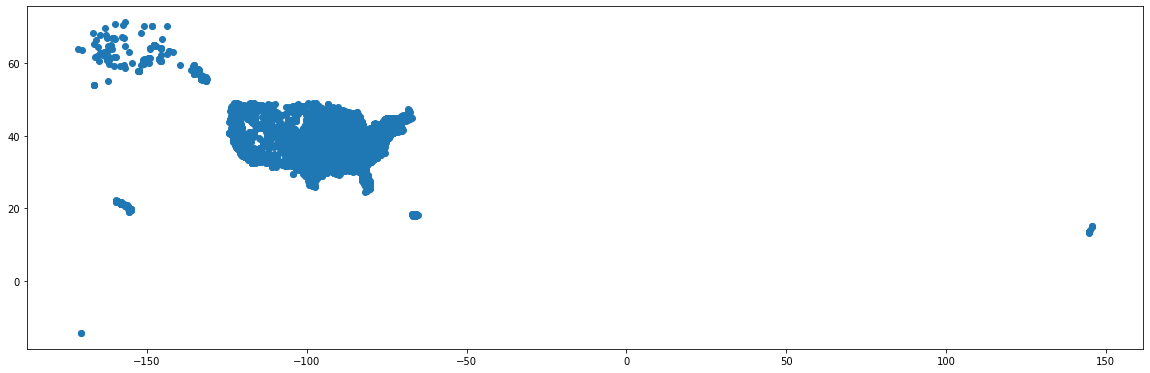

In [181]:
powerplants.plot(figsize=(20,15))

In [89]:
globaltemp = pd.read_csv('GlobalLandTemperaturesByCity.csv')
globaltemp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [119]:
globaltemp.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [121]:
# convert Date to datetime
globaltemp['dt']=pd.to_datetime(globaltemp['dt'],format='%Y-%m-%d')
globaltemp.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [142]:
# data is already monthly
# select most recent 10 years only

globaltemp_10y = globaltemp[globaltemp['dt'].dt.year > 2010]
globaltemp_10y

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3206,2011-01-01,0.098,0.361,Århus,Denmark,57.05N,10.33E
3207,2011-02-01,-0.307,0.322,Århus,Denmark,57.05N,10.33E
3208,2011-03-01,3.042,0.345,Århus,Denmark,57.05N,10.33E
3209,2011-04-01,9.920,0.518,Århus,Denmark,57.05N,10.33E
3210,2011-05-01,11.952,0.286,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [143]:
# select global temp data for united states only

globaltemp_10y = globaltemp_10y[globaltemp_10y['Country'] == 'United States']
globaltemp_10y

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49847,2011-01-01,5.002,0.213,Abilene,United States,32.95N,100.53W
49848,2011-02-01,6.968,0.262,Abilene,United States,32.95N,100.53W
49849,2011-03-01,14.561,0.372,Abilene,United States,32.95N,100.53W
49850,2011-04-01,20.344,0.232,Abilene,United States,32.95N,100.53W
49851,2011-05-01,23.225,0.278,Abilene,United States,32.95N,100.53W
...,...,...,...,...,...,...,...
8439242,2013-05-01,15.544,0.281,Yonkers,United States,40.99N,74.56W
8439243,2013-06-01,20.892,0.273,Yonkers,United States,40.99N,74.56W
8439244,2013-07-01,24.722,0.279,Yonkers,United States,40.99N,74.56W
8439245,2013-08-01,21.001,0.323,Yonkers,United States,40.99N,74.56W


In [144]:
# reformat lat long
globaltemp_10y=globaltemp_10y.copy()
globaltemp_10y['Latitude']=globaltemp_10y['Latitude'].str.rstrip('N')
globaltemp_10y['Latitude']=globaltemp_10y['Latitude'].astype(float)
globaltemp_10y['Longitude']=globaltemp_10y['Longitude'].str.rstrip('W')
globaltemp_10y['Longitude']=globaltemp_10y['Longitude'].astype(float)
globaltemp_10y['Longitude']=globaltemp_10y['Longitude']*-1
globaltemp_10y

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49847,2011-01-01,5.002,0.213,Abilene,United States,32.95,-100.53
49848,2011-02-01,6.968,0.262,Abilene,United States,32.95,-100.53
49849,2011-03-01,14.561,0.372,Abilene,United States,32.95,-100.53
49850,2011-04-01,20.344,0.232,Abilene,United States,32.95,-100.53
49851,2011-05-01,23.225,0.278,Abilene,United States,32.95,-100.53
...,...,...,...,...,...,...,...
8439242,2013-05-01,15.544,0.281,Yonkers,United States,40.99,-74.56
8439243,2013-06-01,20.892,0.273,Yonkers,United States,40.99,-74.56
8439244,2013-07-01,24.722,0.279,Yonkers,United States,40.99,-74.56
8439245,2013-08-01,21.001,0.323,Yonkers,United States,40.99,-74.56


In [145]:
globaltemp_10y.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                float64
Longitude                               float64
dtype: object

In [146]:
usatemp_gdf = gpd.GeoDataFrame(
    globaltemp_10y, geometry=gpd.points_from_xy(x=globaltemp_10y.Longitude, y=globaltemp_10y.Latitude)
)
usatemp_gdf

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,geometry
49847,2011-01-01,5.002,0.213,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
49848,2011-02-01,6.968,0.262,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
49849,2011-03-01,14.561,0.372,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
49850,2011-04-01,20.344,0.232,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
49851,2011-05-01,23.225,0.278,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
...,...,...,...,...,...,...,...,...
8439242,2013-05-01,15.544,0.281,Yonkers,United States,40.99,-74.56,POINT (-74.56000 40.99000)
8439243,2013-06-01,20.892,0.273,Yonkers,United States,40.99,-74.56,POINT (-74.56000 40.99000)
8439244,2013-07-01,24.722,0.279,Yonkers,United States,40.99,-74.56,POINT (-74.56000 40.99000)
8439245,2013-08-01,21.001,0.323,Yonkers,United States,40.99,-74.56,POINT (-74.56000 40.99000)


In [209]:
usatemp_gdf = usatemp_gdf.set_crs(epsg=4326)

In [210]:
usatemp_gdf = usatemp_gdf.to_crs(epsg=3395)

<AxesSubplot:>

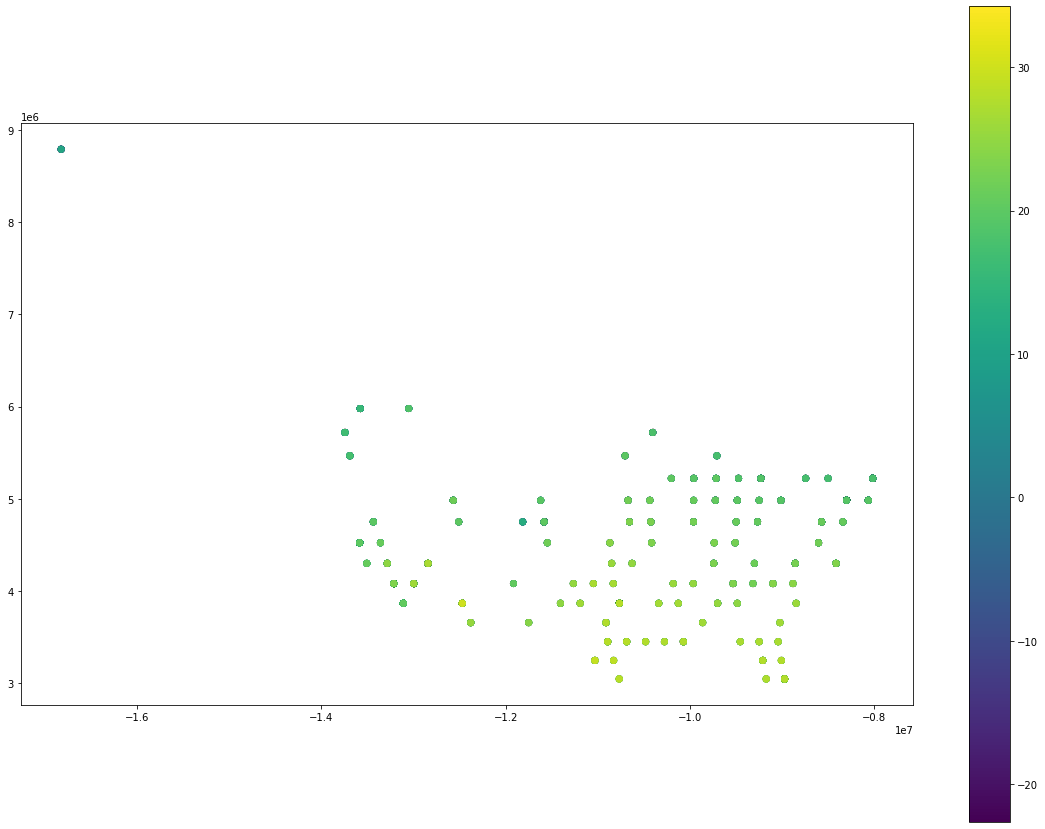

In [315]:
usatemp_gdf.plot(figsize=(20,15),
                column='AverageTemperature',
                legend=True,
                alpha=0.5)

In [90]:
# aqi = air quality index (from EPA)
aqi = pd.read_csv('aqi_daily_1980_to_2021.csv')
aqi

,State Name,Date,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,Alabama,2021-01-01,30,Good,Ozone,34.289001,-85.970065,DeKalb
1,Alabama,2021-01-02,27,Good,Ozone,34.289001,-85.970065,DeKalb
2,Alabama,2021-01-03,34,Good,Ozone,34.289001,-85.970065,DeKalb
3,Alabama,2021-01-04,36,Good,Ozone,34.289001,-85.970065,DeKalb
4,Alabama,2021-01-05,31,Good,Ozone,34.289001,-85.970065,DeKalb
...,...,...,...,...,...,...,...,...
10158522,Wyoming,2020-12-27,32,Good,Ozone,43.845390,-104.205120,Weston
10158523,Wyoming,2020-12-28,30,Good,Ozone,43.845390,-104.205120,Weston
10158524,Wyoming,2020-12-29,33,Good,Ozone,43.845390,-104.205120,Weston
10158525,Wyoming,2020-12-30,33,Good,Ozone,43.845390,-104.205120,Weston


In [108]:
aqi_gdf = gpd.GeoDataFrame(
    aqi, geometry=gpd.points_from_xy(x=aqi.Longitude, y=aqi.Latitude)
)
aqi_gdf

,State Name,Date,AQI,Category,Defining Parameter,Latitude,Longitude,County Name,geometry
0,Alabama,2021-01-01,30,Good,Ozone,34.289001,-85.970065,DeKalb,POINT (-85.97007 34.28900)
1,Alabama,2021-01-02,27,Good,Ozone,34.289001,-85.970065,DeKalb,POINT (-85.97007 34.28900)
2,Alabama,2021-01-03,34,Good,Ozone,34.289001,-85.970065,DeKalb,POINT (-85.97007 34.28900)
3,Alabama,2021-01-04,36,Good,Ozone,34.289001,-85.970065,DeKalb,POINT (-85.97007 34.28900)
4,Alabama,2021-01-05,31,Good,Ozone,34.289001,-85.970065,DeKalb,POINT (-85.97007 34.28900)
...,...,...,...,...,...,...,...,...,...
10158522,Wyoming,2020-12-27,32,Good,Ozone,43.845390,-104.205120,Weston,POINT (-104.20512 43.84539)
10158523,Wyoming,2020-12-28,30,Good,Ozone,43.845390,-104.205120,Weston,POINT (-104.20512 43.84539)
10158524,Wyoming,2020-12-29,33,Good,Ozone,43.845390,-104.205120,Weston,POINT (-104.20512 43.84539)
10158525,Wyoming,2020-12-30,33,Good,Ozone,43.845390,-104.205120,Weston,POINT (-104.20512 43.84539)


In [110]:
aqi_gdf.dtypes

State Name                    object
Date                  datetime64[ns]
AQI                            int64
Category                      object
Defining Parameter            object
Latitude                     float64
Longitude                    float64
County Name                   object
geometry                    geometry
dtype: object

In [106]:
# convert Date to datetime
aqi_gdf['Date']=pd.to_datetime(aqi_gdf['Date'],format='%Y-%m-%d')
aqi_gdf.dtypes

State Name                    object
Date                  datetime64[ns]
AQI                            int64
Category                      object
Defining Parameter            object
Latitude                     float64
Longitude                    float64
County Name                   object
geometry                    geometry
dtype: object

In [117]:
aqi_group = aqi_gdf.set_index('Date')
aqi_group = aqi_group.groupby(['State Name', 'County Name', pd.Grouper(freq='M')])['AQI'].mean()
aqi_group = aqi_group.reset_index()
aqi_group

,State Name,County Name,Date,AQI
0,Alabama,Baldwin,2000-01-31,33.833333
1,Alabama,Baldwin,2000-02-29,59.666667
2,Alabama,Baldwin,2000-03-31,52.466667
3,Alabama,Baldwin,2000-04-30,60.166667
4,Alabama,Baldwin,2000-05-31,55.096774
...,...,...,...,...
381589,Wyoming,Weston,2020-08-31,55.709677
381590,Wyoming,Weston,2020-09-30,43.133333
381591,Wyoming,Weston,2020-10-31,33.677419
381592,Wyoming,Weston,2020-11-30,34.133333


In [118]:
# select most recent 10 years only

aqi_group = aqi_group[aqi_group['Date'].dt.year > 2010]
aqi_group

,State Name,County Name,Date,AQI
130,Alabama,Baldwin,2011-01-31,32.000000
131,Alabama,Baldwin,2011-02-28,40.666667
132,Alabama,Baldwin,2011-03-31,43.322581
133,Alabama,Baldwin,2011-04-30,45.366667
134,Alabama,Baldwin,2011-05-31,45.193548
...,...,...,...,...
381589,Wyoming,Weston,2020-08-31,55.709677
381590,Wyoming,Weston,2020-09-30,43.133333
381591,Wyoming,Weston,2020-10-31,33.677419
381592,Wyoming,Weston,2020-11-30,34.133333


In [153]:
# create geometry reference table for join
aqi_geo = aqi_gdf.drop(columns=['Date', 'AQI', 'Category', 'Defining Parameter', 'Latitude', 'Longitude'])
aqi_geo

,State Name,County Name,geometry
0,Alabama,DeKalb,POINT (-85.97007 34.28900)
1,Alabama,DeKalb,POINT (-85.97007 34.28900)
2,Alabama,DeKalb,POINT (-85.97007 34.28900)
3,Alabama,DeKalb,POINT (-85.97007 34.28900)
4,Alabama,DeKalb,POINT (-85.97007 34.28900)
...,...,...,...
10158522,Wyoming,Weston,POINT (-104.20512 43.84539)
10158523,Wyoming,Weston,POINT (-104.20512 43.84539)
10158524,Wyoming,Weston,POINT (-104.20512 43.84539)
10158525,Wyoming,Weston,POINT (-104.20512 43.84539)


In [158]:
aqi_geo = aqi_geo.drop_duplicates()
aqi_geo

,State Name,County Name,geometry
0,Alabama,DeKalb,POINT (-85.97007 34.28900)
58,Alabama,Jefferson,POINT (-86.79639 33.56528)
118,Alaska,Denali,POINT (-148.96760 63.72320)
177,Arizona,Apache,POINT (-109.44126 34.05848)
264,Arizona,Cochise,POINT (-109.38906 32.00941)
...,...,...,...
9712881,Oklahoma,Grant,POINT (-97.49000 36.61000)
9738487,Pennsylvania,Wyoming,POINT (-75.95774 41.60524)
10095318,Texas,Atascosa,POINT (-98.58916 29.16300)
10104669,Texas,Karnes,POINT (-97.88806 28.88044)


In [200]:
aqi_gdf_usa = pd.merge(aqi_group, aqi_geo,  how='left', left_on=['State Name','County Name'], right_on = ['State Name','County Name'])
aqi_gdf_usa

,State Name,County Name,Date,AQI,geometry
0,Alabama,Baldwin,2011-01-31,32.000000,POINT (-87.88026 30.49748)
1,Alabama,Baldwin,2011-02-28,40.666667,POINT (-87.88026 30.49748)
2,Alabama,Baldwin,2011-03-31,43.322581,POINT (-87.88026 30.49748)
3,Alabama,Baldwin,2011-04-30,45.366667,POINT (-87.88026 30.49748)
4,Alabama,Baldwin,2011-05-31,45.193548,POINT (-87.88026 30.49748)
...,...,...,...,...,...
116354,Wyoming,Weston,2020-08-31,55.709677,POINT (-104.20512 43.84539)
116355,Wyoming,Weston,2020-09-30,43.133333,POINT (-104.20512 43.84539)
116356,Wyoming,Weston,2020-10-31,33.677419,POINT (-104.20512 43.84539)
116357,Wyoming,Weston,2020-11-30,34.133333,POINT (-104.20512 43.84539)


In [201]:
aqi_gdf_usa = gpd.GeoDataFrame(
    aqi_gdf_usa, geometry=aqi_gdf_usa.geometry
)
aqi_gdf_usa

,State Name,County Name,Date,AQI,geometry
0,Alabama,Baldwin,2011-01-31,32.000000,POINT (-87.88026 30.49748)
1,Alabama,Baldwin,2011-02-28,40.666667,POINT (-87.88026 30.49748)
2,Alabama,Baldwin,2011-03-31,43.322581,POINT (-87.88026 30.49748)
3,Alabama,Baldwin,2011-04-30,45.366667,POINT (-87.88026 30.49748)
4,Alabama,Baldwin,2011-05-31,45.193548,POINT (-87.88026 30.49748)
...,...,...,...,...,...
116354,Wyoming,Weston,2020-08-31,55.709677,POINT (-104.20512 43.84539)
116355,Wyoming,Weston,2020-09-30,43.133333,POINT (-104.20512 43.84539)
116356,Wyoming,Weston,2020-10-31,33.677419,POINT (-104.20512 43.84539)
116357,Wyoming,Weston,2020-11-30,34.133333,POINT (-104.20512 43.84539)


In [206]:
aqi_gdf_usa = aqi_gdf_usa.set_crs(epsg=4326)

<AxesSubplot:>

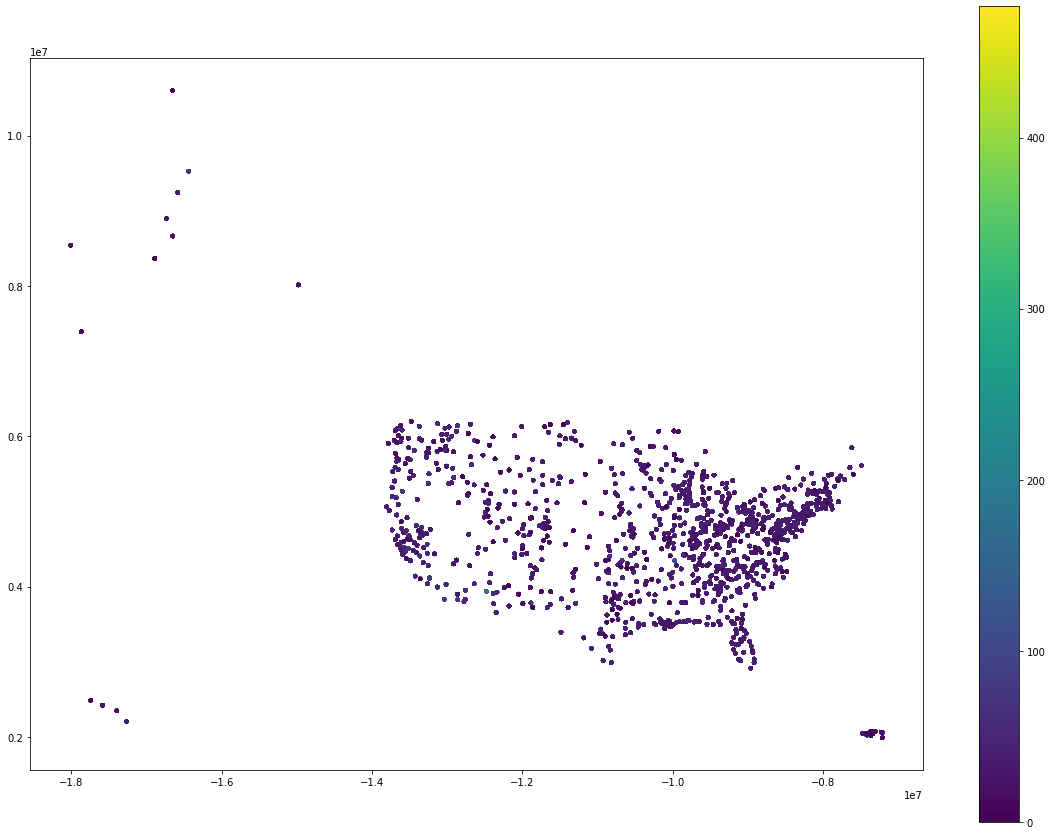

In [310]:
aqi_gdf_usa.plot(figsize=(20,15),
                column='AQI',
                 markersize=10,
                legend=True)

In [193]:
soils.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

c:\users\khaai\appdata\local\programs\python\python38\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

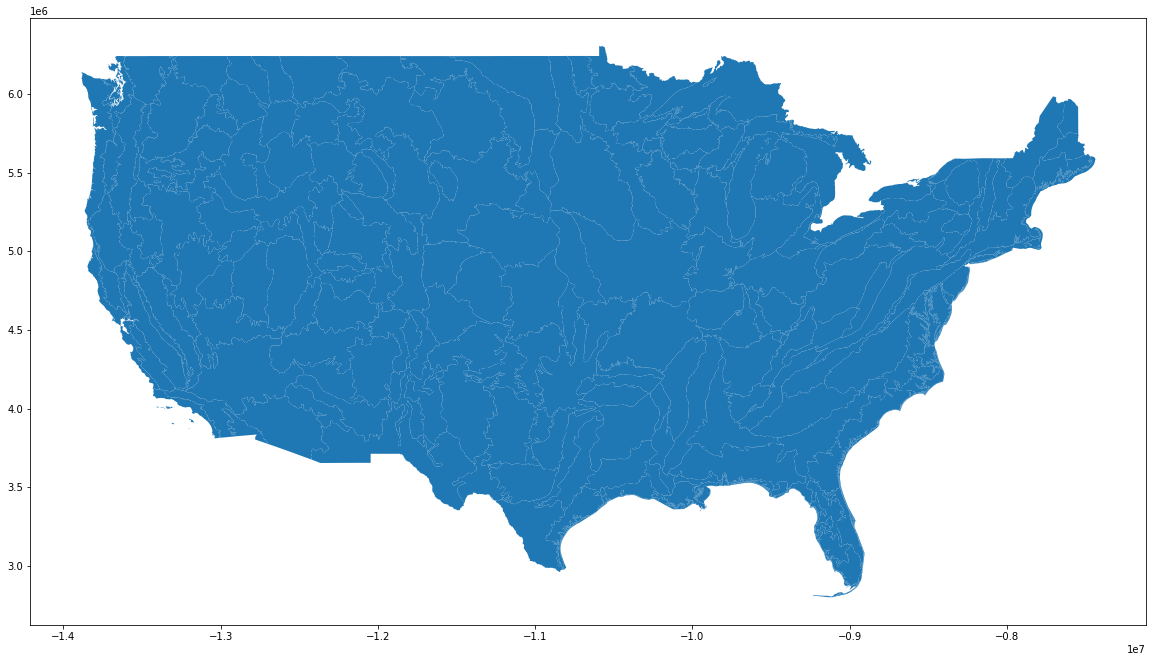

In [195]:
soils = soils.to_crs({'init': 'epsg:3395'})
soils.plot(figsize=(20,20))

<AxesSubplot:>

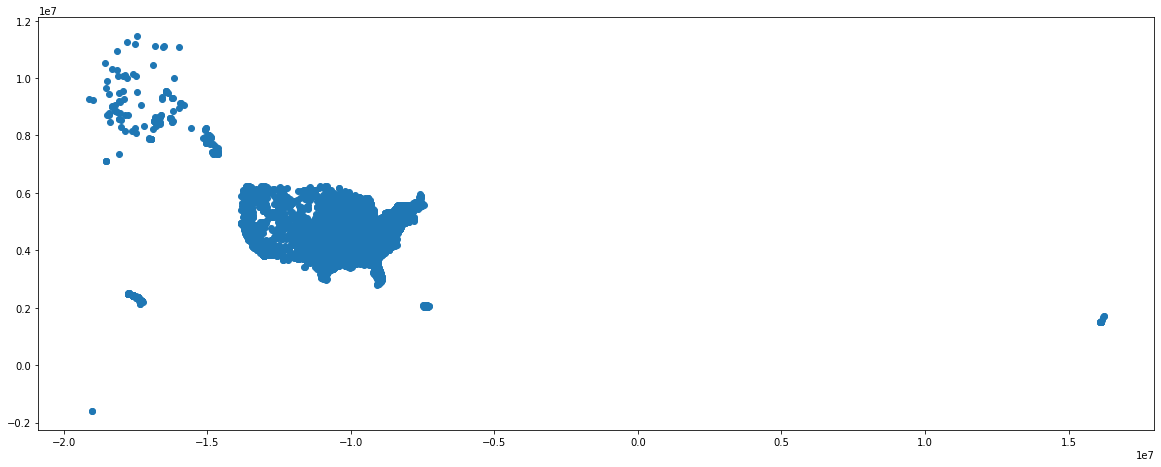

In [196]:
powerplants = powerplants.to_crs(epsg=3395)
powerplants.plot(figsize=(20,20))

<AxesSubplot:>

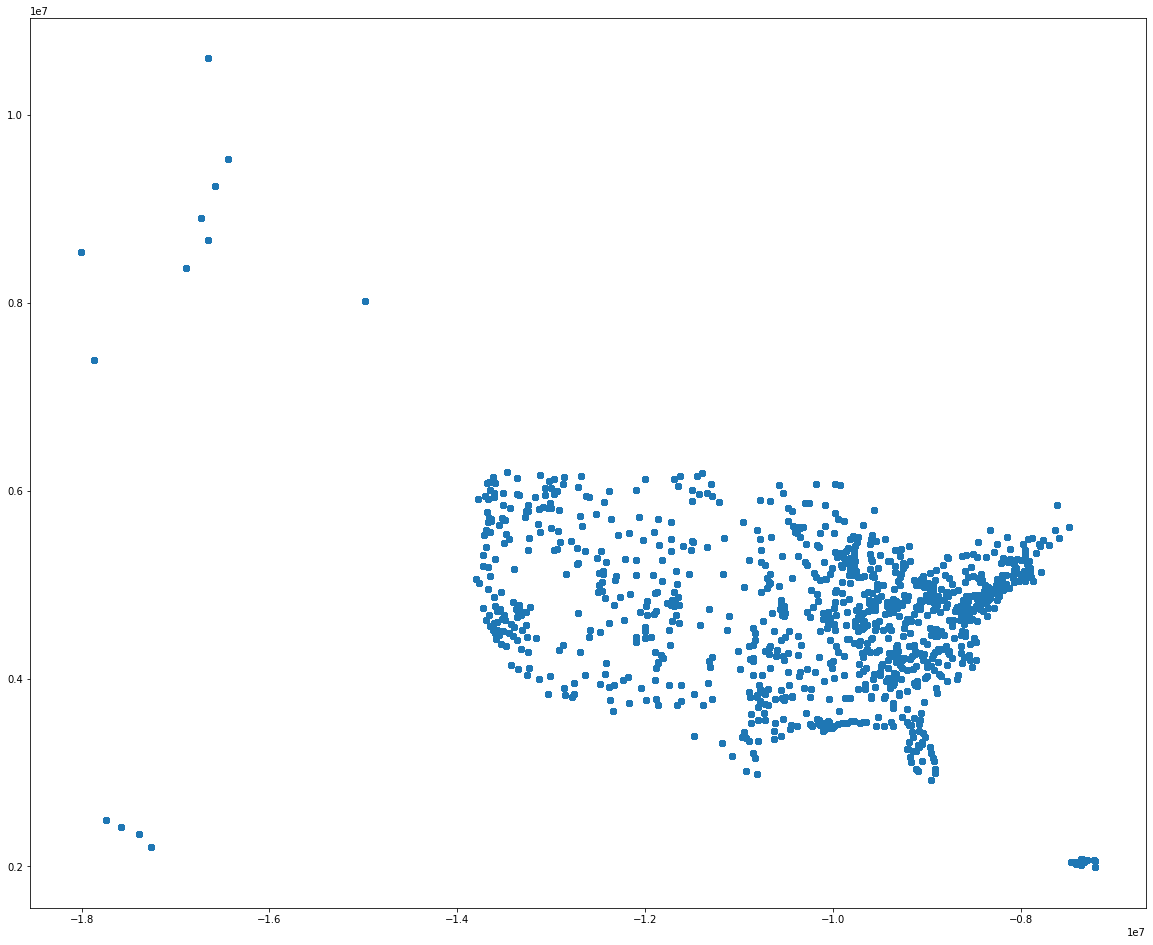

In [207]:
aqi_gdf_usa = aqi_gdf_usa.to_crs(epsg=3395)
aqi_gdf_usa.plot(figsize=(20,20))

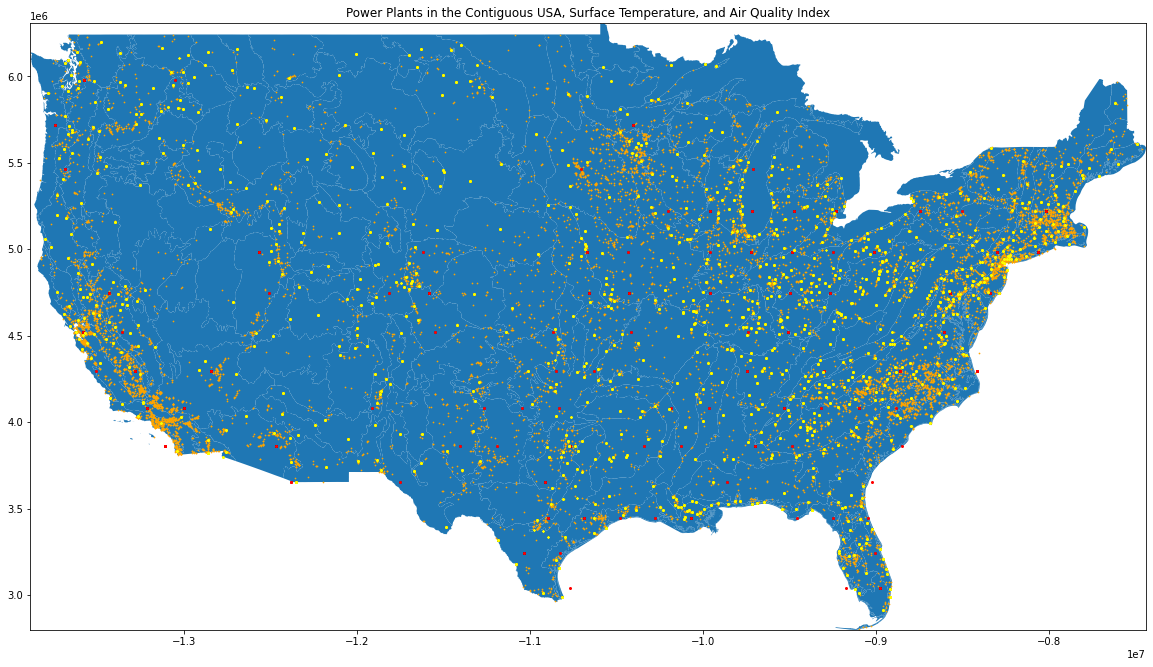

In [212]:
# Plot overlayed maps
fig, ax = plt.subplots(figsize=(20,20))
soils.plot(ax=ax)
powerplants.plot(markersize=0.5, color='orange',ax=ax)
usatemp_gdf.plot(markersize=0.5, color='red',ax=ax)
aqi_gdf_usa.plot(markersize=0.5, color='yellow',ax=ax)

xlim = ([soils.total_bounds[0],  soils.total_bounds[2]])
ylim = ([soils.total_bounds[1],  soils.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set(title='Power Plants in the Contiguous USA, Surface Temperature, and Air Quality Index')
plt.show()

[Text(0.5, 1.0, 'Power Plants in the Contiguous USA, 3km Buffer')]

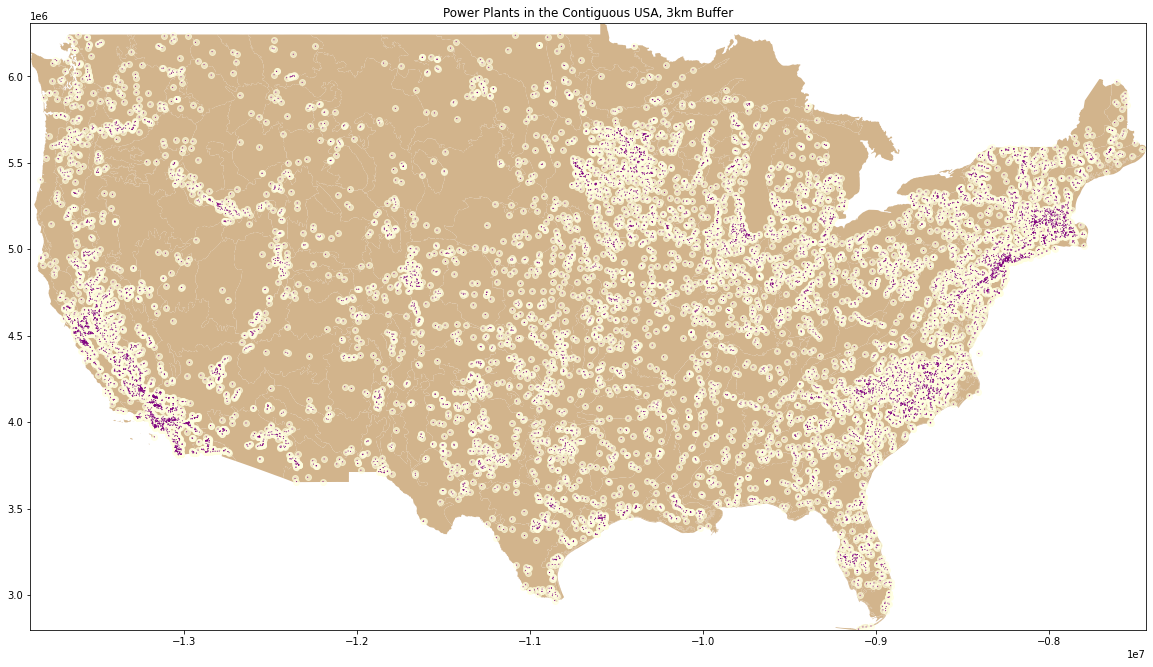

In [233]:
# buffer
powerplants_3km = powerplants.buffer(3000)

fig, ax = plt.subplots(figsize=(20,20))
xlim = ([soils.total_bounds[0],  soils.total_bounds[2]])
ylim = ([soils.total_bounds[1],  soils.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

soils.plot(ax=ax, color='tan', linewidth=1)
powerplants.plot(ax=ax, color='lightyellow', alpha=0.6)
powerplants_3km.plot(ax=ax, color='purple')
ax.set(title='Power Plants in the Contiguous USA, 3km Buffer')

[Text(0.5, 1.0, 'Soil pH in Layer 1 across Contiguous USA, with centroids')]

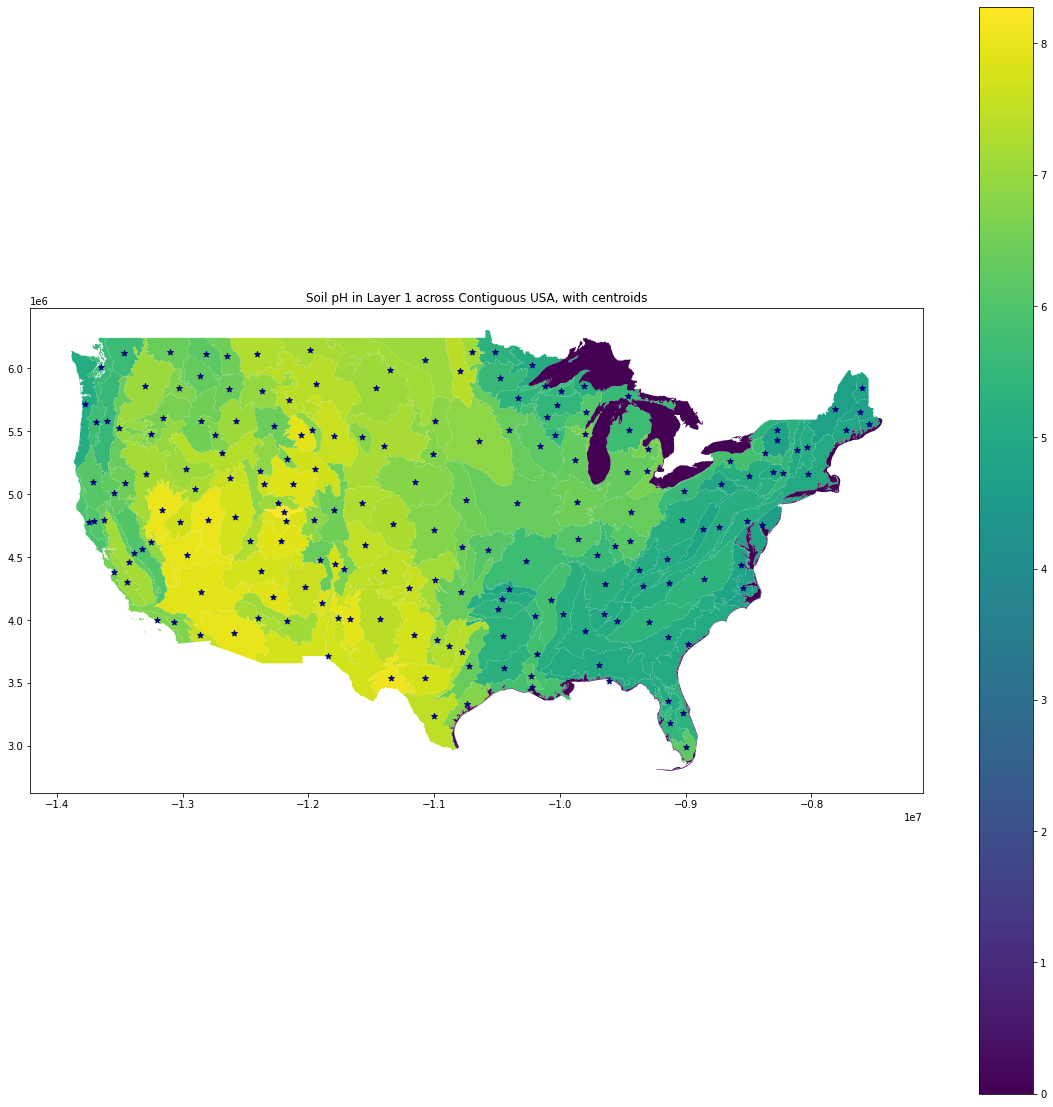

In [235]:
fig, ax = plt.subplots(figsize=(20,20))
soils.plot(figsize=(20,20),
           column='PH_LYR1',
           ax=ax, 
           legend=True
          )
soils.centroid.plot(ax=ax,
                    color='navy',
                    marker='*'
                   )
ax.set(title='Soil pH in Layer 1 across Contiguous USA, with centroids')

In [241]:
# clip aqi dataset to the same extent as soils (for contiguous USA only) -- retrieve extent coordinates
soils.total_bounds

array([-13888510.79142947,   2800475.41982587,  -7435923.60320038,
         6308225.81996601])

<AxesSubplot:>

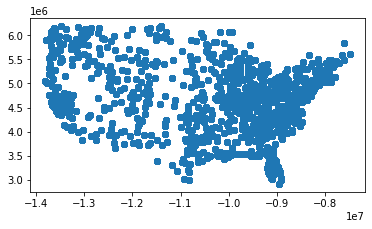

In [244]:
# perform clip

aqi_gdf_usa_clipped = gpd.clip(aqi_gdf_usa, soils)
aqi_gdf_usa_clipped.plot()

In [248]:
pp_3km = gpd.GeoDataFrame(geometry=gpd.GeoSeries(powerplants_3km))

In [249]:
pp_3km

,geometry
0,"POLYGON ((-12735514.443 5212195.981, -12735528..."
1,"POLYGON ((-11889822.648 4722635.968, -11889837..."
2,"POLYGON ((-11888364.095 4746714.020, -11888378..."
3,"POLYGON ((-11672620.468 5148670.676, -11672634..."
4,"POLYGON ((-11794385.525 5543377.652, -11794399..."
...,...
11805,"POLYGON ((-8553226.712 4325257.232, -8553241.1..."
11806,"POLYGON ((-8944373.095 4235563.292, -8944387.5..."
11807,"POLYGON ((-10658969.321 5371714.314, -10658983..."
11808,"POLYGON ((-10320317.023 5481493.268, -10320331..."


In [257]:
# spatial join with soils and powerplants
soils_pp = gpd.sjoin(soils, pp_3km, op='contains')
soils_pp.head()

,MAP_TYPE,MAP_LEVEL,PROJECT,MAP_UNIT_S,MAP_UNIT_N,MAP_UNIT_D,AWC_100_CM,AWC_150_CM,AWC_250_CM,HYDRO_GP_A,...,SECTION_ID,AREA,PERIMETER,ACRES,GIS_ACRES,GIS_MILES,SHAPE_AREA,SHAPE_LEN,geometry,index_right
0,ECUN,SECT,ECOMAP07,332B,Western Glaciated Plains,The landscape of this section consists of leve...,17.27,25.23,26.2,2.0,...,44,0.0,1.957214e+06,8.776488e+06,8776448.634,1228.911,4.046853,20.89508,"POLYGON ((-11133918.549 5479877.740, -11134963...",6109
0,ECUN,SECT,ECOMAP07,332B,Western Glaciated Plains,The landscape of this section consists of leve...,17.27,25.23,26.2,2.0,...,44,0.0,1.957214e+06,8.776488e+06,8776448.634,1228.911,4.046853,20.89508,"POLYGON ((-11133918.549 5479877.740, -11134963...",5389
0,ECUN,SECT,ECOMAP07,332B,Western Glaciated Plains,The landscape of this section consists of leve...,17.27,25.23,26.2,2.0,...,44,0.0,1.957214e+06,8.776488e+06,8776448.634,1228.911,4.046853,20.89508,"POLYGON ((-11133918.549 5479877.740, -11134963...",5390
0,ECUN,SECT,ECOMAP07,332B,Western Glaciated Plains,The landscape of this section consists of leve...,17.27,25.23,26.2,2.0,...,44,0.0,1.957214e+06,8.776488e+06,8776448.634,1228.911,4.046853,20.89508,"POLYGON ((-11133918.549 5479877.740, -11134963...",7502
0,ECUN,SECT,ECOMAP07,332B,Western Glaciated Plains,The landscape of this section consists of leve...,17.27,25.23,26.2,2.0,...,44,0.0,1.957214e+06,8.776488e+06,8776448.634,1228.911,4.046853,20.89508,"POLYGON ((-11133918.549 5479877.740, -11134963...",5388


In [259]:
# join with powerplants data
soils_pp_merge = pd.merge(powerplants, soils_pp, left_on='OBJECTID', right_on='index_right')
soils_pp_merge

,OBJECTID,PLANT_CODE,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,STATUS,...,SECTION_ID,AREA,PERIMETER,ACRES,GIS_ACRES,GIS_MILES,SHAPE_AREA,SHAPE_LEN,geometry_y,index_right
0,3,7458,RUEDI,14151 FRYING PAN ROAD,ASPEN,CO,81611,NOT AVAILABLE,CONVENTIONAL HYDROELECTRIC,OP,...,87,0.0,4.117215e+06,2.932741e+07,2.932766e+07,2560.535,13.239887,44.717794,"POLYGON ((-11647311.226 5259253.303, -11645877...",3
1,4,6204,LARAMIE RIVER STATION,HWY 320,WHEATLAND,WY,82201,NOT AVAILABLE,CONVENTIONAL STEAM COAL,OP,...,51,0.0,1.803189e+06,1.515128e+07,1.515186e+07,1129.033,6.900328,19.326587,"POLYGON ((-11906169.009 5351226.482, -11906049...",4
2,5,8028,ARVADA,HWY 14,ARVADA,WY,82831,NOT AVAILABLE,NATURAL GAS FIRED COMBUSTION TURBINE,OP,...,51,0.0,1.803189e+06,1.515128e+07,1.515186e+07,1129.033,6.900328,19.326587,"POLYGON ((-11906169.009 5351226.482, -11906049...",5
3,6,8026,HARTZOG,HWY 50,WRIGHT,WY,82732,NOT AVAILABLE,NATURAL GAS FIRED COMBUSTION TURBINE,OP,...,51,0.0,1.803189e+06,1.515128e+07,1.515186e+07,1129.033,6.900328,19.326587,"POLYGON ((-11906169.009 5351226.482, -11906049...",6
4,7,8030,BARBER CREEK,INTERSTATE 90,GILLETTE,WY,82718,NOT AVAILABLE,NATURAL GAS FIRED COMBUSTION TURBINE,OP,...,12,0.0,3.113364e+06,1.730007e+07,1.730004e+07,1934.137,8.347976,35.259097,"POLYGON ((-11215286.972 5900756.261, -11215053...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9608,11804,57884,LAKE CHARLES POLYMERS,4101 HIGHWAY 108 S,WESTLAKE,LA,70669,NOT AVAILABLE,NATURAL GAS FIRED COMBUSTION TURBINE; NATURAL ...,OP,...,184,0.0,2.206324e+06,6.212266e+06,6.212387e+06,1387.007,2.328621,20.919654,"POLYGON ((-9209201.023 3462144.143, -9209500.3...",11804
9609,11806,60487,"RIVER ROAD SOLAR, LLC",951 RIVER ROAD,COFIELD,NC,27922,NOT AVAILABLE,SOLAR PHOTOVOLTAIC,OP,...,141,0.0,1.849062e+06,2.099585e+07,2.099635e+07,1150.037,8.532977,18.799753,"POLYGON ((-9157496.298 4160692.904, -9157221.9...",11806
9610,11807,2720,BUCK,1555 DUKEVILLE RD,SALISBURY,NC,28145,(704) 382-4327,CONVENTIONAL STEAM COAL; NATURAL GAS FIRED COM...,OP,...,49,0.0,2.296524e+06,3.174294e+07,3.174319e+07,1440.428,14.392711,24.426206,"POLYGON ((-10433972.608 5440933.490, -10433788...",11807
9611,11808,56587,MINNESOTA BREEZE LLC,28431 KING AVENUE,RUSHMORE,MN,56168,NOT AVAILABLE,ONSHORE WIND TURBINE,OP,...,91,0.0,2.229233e+06,1.244257e+07,1.244248e+07,1384.208,5.618155,24.306783,"POLYGON ((-10312366.864 5419817.300, -10312417...",11808


c:\users\khaai\appdata\local\programs\python\python38\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Powerplants in USA by Amount of Net Power Generated over Soil Layer 1 pH')

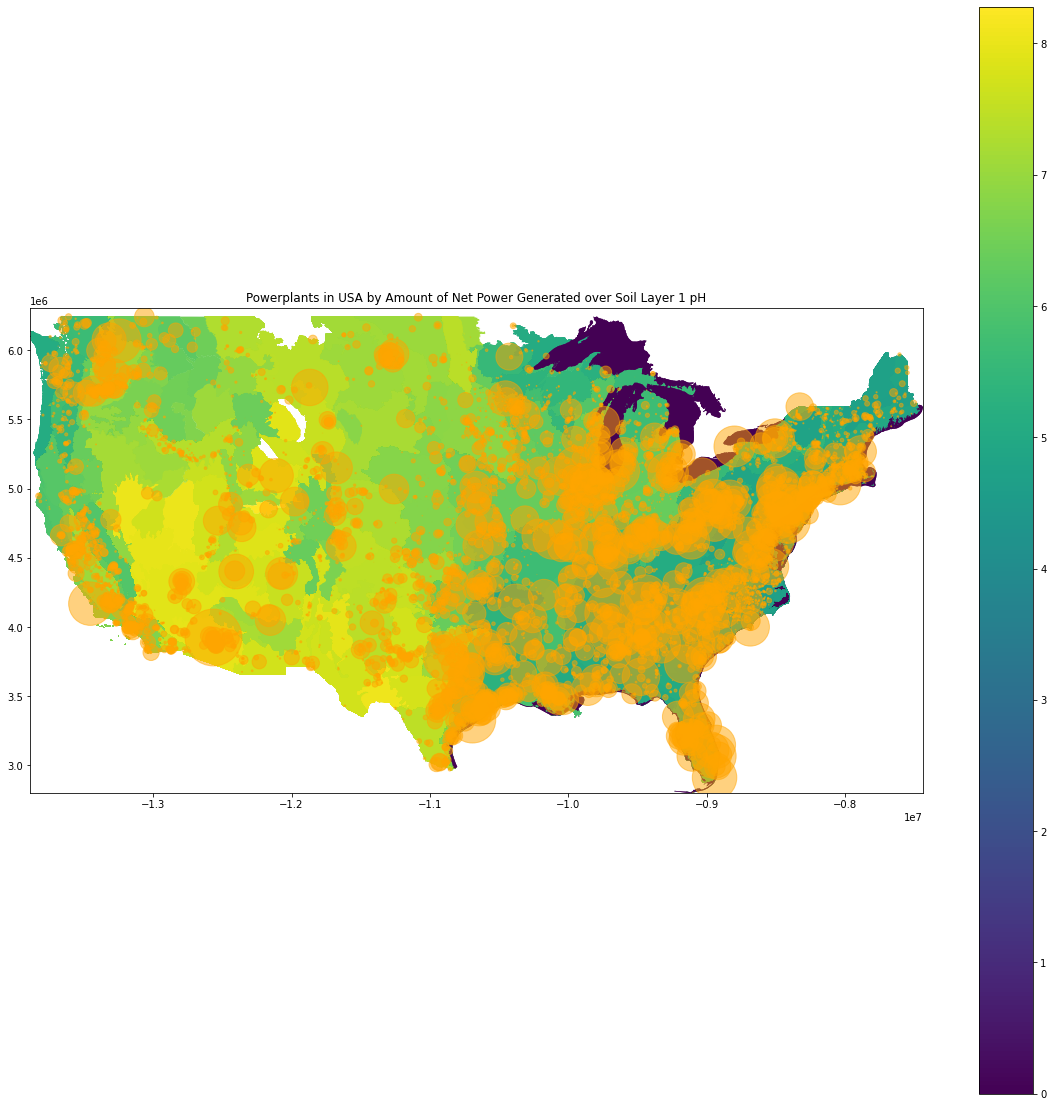

In [268]:
fig, ax = plt.subplots(figsize=(20,20))
xlim = ([soils.total_bounds[0],  soils.total_bounds[2]])
ylim = ([soils.total_bounds[1],  soils.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)
soils_pp.plot(ax=ax,
              column='PH_LYR1',
              legend=True
             )
powerplants.plot(ax=ax,
                 markersize=powerplants['NET_GEN']/10000,
                 color='orange',
                 alpha=0.5
                )
ax.set_title('Powerplants in USA by Amount of Net Power Generated over Soil Layer 1 pH')

In [272]:
# Create a new variable for one of the datasets that sums/counts a geographic feature of another dataset 
# (can be original or derivative of previous task).

# Created count_of_pp = Number of Power Plants per Soil Map Unit

soils_pp['count_of_pp'] = 1
soils_pp_count = soils_pp.groupby('MAP_UNIT_S')['count_of_pp'].sum()
soils_pp_count = soils_pp_count.reset_index()
soils_pp_count

,MAP_UNIT_S,count_of_pp
0,211A,8
1,211B,14
2,211C,5
3,211D,54
4,211E,90
...,...,...
182,M341A,2
183,M341B,2
184,M341C,7
185,M341D,4
